In [101]:
import pandas as pd
import json
from easonsi import utils
from collections import defaultdict
import matplotlib.pyplot as plt

In [50]:
dpath  = '/home/qsm22/datasets/weibo_topic_recognition/raw_data/train.csv'
df = pd.read_csv(dpath,  sep='\t', encoding="utf-8")
print(df.head())

   ID                                               Text         Label
0   0   原来是这样啊，又是一个新的道理，简直让我长知识了，七星连珠是很难得的一种现象，这个解析也太到位了  label_878402
1   1   老师好厉害，咱就是说，老师，能不能，就是，研究一下能不能穿越🙏 代入感很强，我已经想穿越去...  label_878402
2   2  这个七星连珠的现象居然真的存在，我只在小说上面看过，太神奇了吧，至于其他的我也不太懂，科学现...  label_878402
3   3        应该听过张老师讲，这一个的人都会觉得特别的清晰吧，而且也明白七星连珠不会引发危害。 ​  label_878402
4   4                七星连珠这不是应该是天文知识吗，怎么物理也可以，学霸的世界我果然不懂啊  label_878402


In [68]:
print(df)

          ID                                               Text         Label
0          0   原来是这样啊，又是一个新的道理，简直让我长知识了，七星连珠是很难得的一种现象，这个解析也太到位了  label_878402
1          1   老师好厉害，咱就是说，老师，能不能，就是，研究一下能不能穿越🙏 代入感很强，我已经想穿越去...  label_878402
2          2  这个七星连珠的现象居然真的存在，我只在小说上面看过，太神奇了吧，至于其他的我也不太懂，科学现...  label_878402
3          3        应该听过张老师讲，这一个的人都会觉得特别的清晰吧，而且也明白七星连珠不会引发危害。 ​  label_878402
4          4                七星连珠这不是应该是天文知识吗，怎么物理也可以，学霸的世界我果然不懂啊  label_878402
...      ...                                                ...           ...
77309  77309  甘肃兰州2022年文化和自然遗产日主场城市活动亮点抢先看甘肃兰州2022年文化和自然遗产日主...   label_82331
77310  77310  《焦点访谈》 20220611 让文物活起来 国宝自己会“说话” 《焦点访谈》 202206...   label_82331
77311  77311                             甘肃加大农机装备力量投入“三夏”生产网页链接   label_82331
77312  77312                             小范书记们，村民都在等荐书 网页链接 ​​​   label_82331
77313  77313                      主汛期洪涝、干旱风险高 甘肃坚持“宁可防空，不可空防” ​   label_82331

[77314 rows x 3 columns]


In [60]:
def transfer_to_json(df,out_path):
    fw = open(out_path, 'w', encoding='utf-8')
    for i in range(len(df)):
        l = {}
        l["id"] = int(df.iloc[i,0])
        l["text"] = df.iloc[i,1]
        l["label"] = df.iloc[i,2].split("，")
        l = json.dumps(l, ensure_ascii=False)
        fw.write(l + '\n')
    fw.close()



In [61]:
transfer_to_json(df,"/home/qsm22/datasets/weibo_topic_recognition/train.json")

In [65]:
data = utils.LoadJsonl("/home/qsm22/datasets/weibo_topic_recognition/train.json")

In [67]:
len(data)

77314

In [69]:
categories = set()
for d in data:
    for label in d['label']:
        categories.add(label)

In [70]:
len(categories)

1399

In [114]:
def count(data):
    text_len_list = []
    label_count_list = []
    for d in data:
        text = d['text']
        label = d['label']
        text_len_list.append(len(text))
        label_count_list.append(len(label))
    
    return text_len_list,label_count_list
    #return sum(text_len_list)/len(text_len_list),max(text_len_list), sum(label_count_list)/len(label_count_list),max(label_count_list)

In [115]:
text_len_list,label_count_list = count(data)

In [116]:
print(sum(text_len_list)/len(text_len_list),max(text_len_list), sum(label_count_list)/len(label_count_list),max(label_count_list))

55.01827612075433 271 1.51751299893939 8


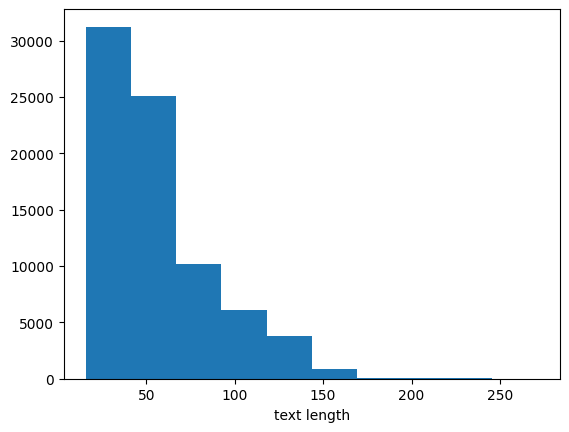

In [120]:
plt.hist(text_len_list)
plt.xlabel('text length')
plt.show()

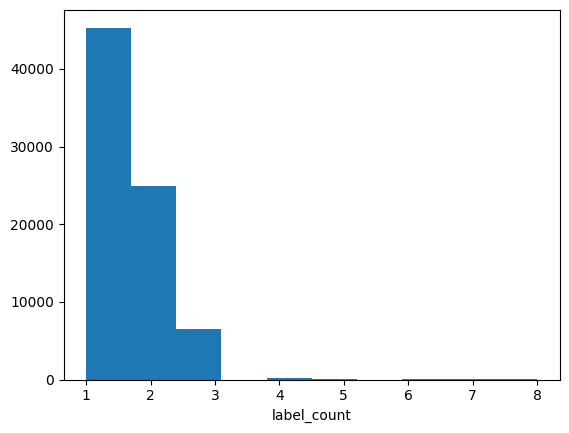

In [122]:
plt.hist(label_count_list)
plt.xlabel('label_count')
plt.show()

In [89]:
def label_dis(data):
    res = defaultdict(int)
    for d in data:
        for label in d['label']:
            res[label] += 1
    return res

In [91]:
label_count = label_dis(data)

In [97]:
sorted(label_count.items(), key=lambda x : x[1],reverse=True)


[('label_1191241', 10235),
 ('label_1008181', 10023),
 ('label_1281707', 4680),
 ('label_1515062', 4671),
 ('label_472394', 4671),
 ('label_742793', 2783),
 ('label_1411524', 1906),
 ('label_1265038', 1881),
 ('label_896157', 1730),
 ('label_1064693', 1719),
 ('label_467023', 1641),
 ('label_1474127', 1421),
 ('label_1227838', 1066),
 ('label_1166118', 1066),
 ('label_19479', 1060),
 ('label_287908', 828),
 ('label_753343', 719),
 ('label_1056127', 716),
 ('label_529001', 711),
 ('label_512340', 704),
 ('label_1438711', 695),
 ('label_313744', 675),
 ('label_1517029', 652),
 ('label_408651', 618),
 ('label_167080', 607),
 ('label_727417', 588),
 ('label_82331', 585),
 ('label_16631', 491),
 ('label_480366', 489),
 ('label_1182442', 486),
 ('label_197715', 482),
 ('label_1319820', 477),
 ('label_432046', 461),
 ('label_238628', 454),
 ('label_648491', 437),
 ('label_1463330', 434),
 ('label_1055138', 413),
 ('label_1254017', 413),
 ('label_635234', 412),
 ('label_1279907', 412),
 ('labe

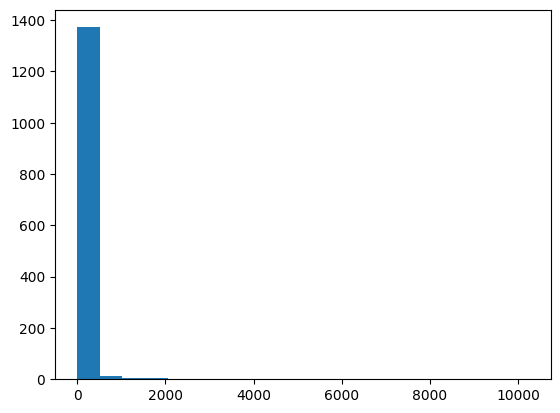

In [109]:
plt.hist(label_count.values(),bins=20)
plt.show()